In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset=dataset.drop(['Id'], axis=1)

In [ ]:
dataset.columns = ["sepal length (cm)",
                   "sepal width (cm)",
                   "petal length (cm)",
                   "petal width (cm)",
                   "species"]

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


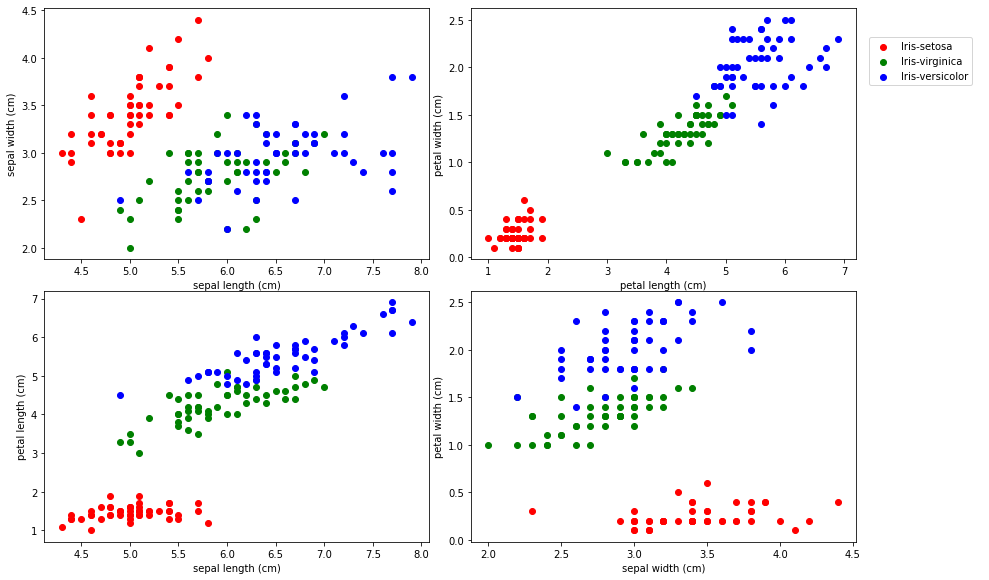

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ["r", "g", "b"]
labels = ["Iris-setosa","Iris-virginica","Iris-versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"]==j][x], dataset[dataset["species"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [ ]:
X = dataset.drop("species",axis=1).values
y = dataset["species"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=3, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.17147660
epoch:  1  loss: 1.08298886
epoch:  2  loss: 1.02709794
epoch:  3  loss: 0.97736681
epoch:  4  loss: 0.91991246
epoch:  5  loss: 0.86256540
epoch:  6  loss: 0.80491024
epoch:  7  loss: 0.74204570
epoch:  8  loss: 0.68127239
epoch:  9  loss: 0.62613302
epoch: 10  loss: 0.57688051
epoch: 11  loss: 0.53456366
epoch: 12  loss: 0.49762484
epoch: 13  loss: 0.46526241
epoch: 14  loss: 0.43767035
epoch: 15  loss: 0.41256300
epoch: 16  loss: 0.38795242
epoch: 17  loss: 0.36375725
epoch: 18  loss: 0.33821449
epoch: 19  loss: 0.31252107
epoch: 20  loss: 0.28661403
epoch: 21  loss: 0.26193619
epoch: 22  loss: 0.23884185
epoch: 23  loss: 0.21705069
epoch: 24  loss: 0.19673970
epoch: 25  loss: 0.17775004
epoch: 26  loss: 0.16039120
epoch: 27  loss: 0.14492068
epoch: 28  loss: 0.13091575
epoch: 29  loss: 0.11886290
epoch: 30  loss: 0.10842178
epoch: 31  loss: 0.09923685
epoch: 32  loss: 0.09147958
epoch: 33  loss: 0.08491538
epoch: 34  loss: 0.07915394
epoch: 35  loss: 0.0

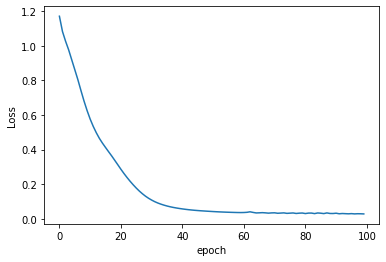

In [ ]:
tensor1 = torch.tensor(losses,requires_grad=True)
losses=tensor1.detach().numpy()
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [ ]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correct
0,0,0,1
1,0,0,1
2,2,2,1
3,2,2,1
4,2,2,1
5,1,1,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,2,0


In [ ]:
df['Correct'].sum() / len(df)

0.9666666666666667

In [ ]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])


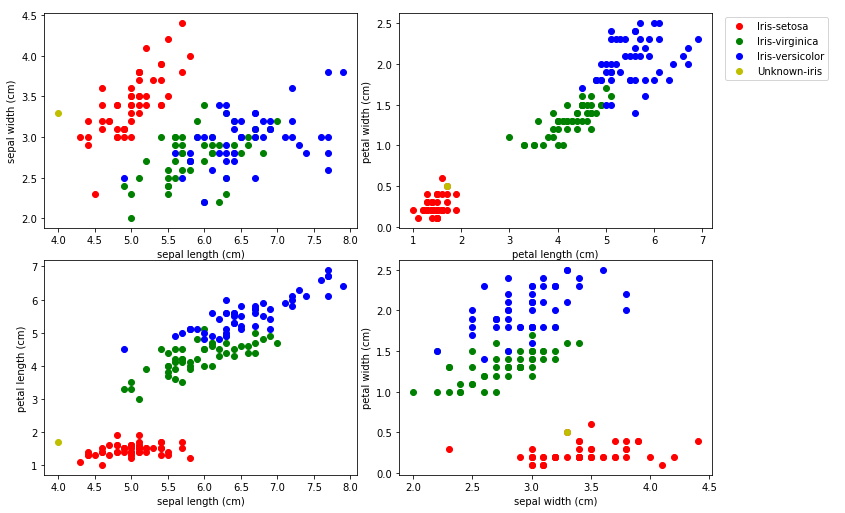

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['r', 'g', 'b']
labels = ['Iris-setosa','Iris-virginica','Iris-versicolor','Unknown-iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"]==j][x], dataset[dataset["species"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(unknown_iris[plots[i][0]],unknown_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [ ]:
with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])

tensor([ 13.5247,   8.0331, -16.5855])

Iris-setosa


In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset=dataset.drop(['Id'], axis=1)

In [ ]:
dataset.columns = ["sepal length (cm)",
                   "sepal width (cm)",
                   "petal length (cm)",
                   "petal width (cm)",
                   "species"]

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


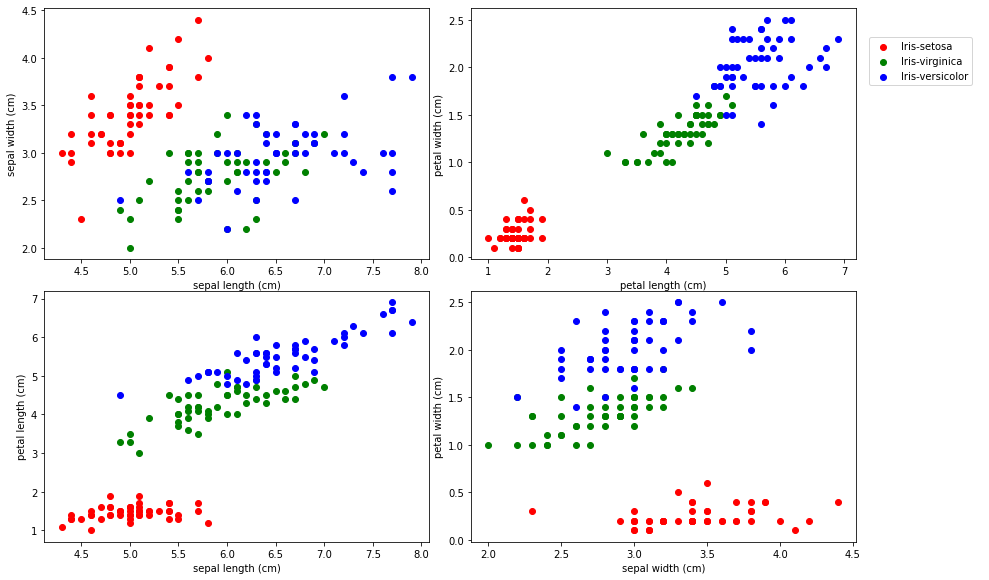

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ["r", "g", "b"]
labels = ["Iris-setosa","Iris-virginica","Iris-versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"]==j][x], dataset[dataset["species"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [ ]:
X = dataset.drop("species",axis=1).values
y = dataset["species"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=10, hidden_layer2=10, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.15371823
epoch:  1  loss: 1.11432612
epoch:  2  loss: 1.08549869
epoch:  3  loss: 1.06692672
epoch:  4  loss: 1.04861701
epoch:  5  loss: 1.03298867
epoch:  6  loss: 1.01158738
epoch:  7  loss: 0.98903561
epoch:  8  loss: 0.97320908
epoch:  9  loss: 0.95730740
epoch: 10  loss: 0.93895191
epoch: 11  loss: 0.91784203
epoch: 12  loss: 0.89330214
epoch: 13  loss: 0.86626565
epoch: 14  loss: 0.84150946
epoch: 15  loss: 0.82218379
epoch: 16  loss: 0.80114913
epoch: 17  loss: 0.77681702
epoch: 18  loss: 0.75049293
epoch: 19  loss: 0.72428089
epoch: 20  loss: 0.69984829
epoch: 21  loss: 0.67725891
epoch: 22  loss: 0.65367085
epoch: 23  loss: 0.62781739
epoch: 24  loss: 0.60239303
epoch: 25  loss: 0.58180833
epoch: 26  loss: 0.56269389
epoch: 27  loss: 0.54147708
epoch: 28  loss: 0.51844734
epoch: 29  loss: 0.49681962
epoch: 30  loss: 0.47772443
epoch: 31  loss: 0.46075079
epoch: 32  loss: 0.44368333
epoch: 33  loss: 0.42689961
epoch: 34  loss: 0.41201049
epoch: 35  loss: 0.3

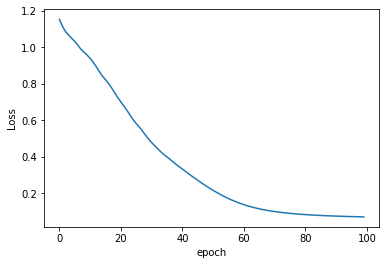

In [ ]:
tensor1 = torch.tensor(losses,requires_grad=True)
losses=tensor1.detach().numpy()
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [ ]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correct
0,0,0,1
1,0,0,1
2,1,1,1
3,1,1,1
4,1,1,1
5,0,0,1
6,1,1,1
7,0,0,1
8,2,2,1
9,0,0,1


In [ ]:
df['Correct'].sum() / len(df)

1.0

In [ ]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])


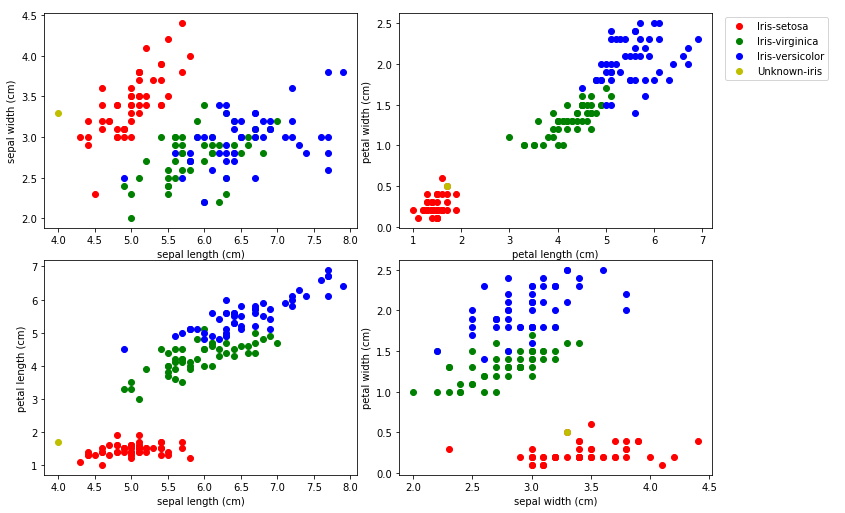

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['r', 'g', 'b']
labels = ['Iris-setosa','Iris-virginica','Iris-versicolor','Unknown-iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"]==j][x], dataset[dataset["species"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(unknown_iris[plots[i][0]],unknown_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [ ]:
with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])

tensor([ 5.0128,  0.9326, -8.3473])

Iris-setosa


Son simialres?

Ambos modelos dan buenos resultados sinembargo el primero con el numero de nueronas mas alto alcanza menores perdidas mas rapido que con menor numero de neuronas.

Entre keras y ptorch tenemos diferencias

a) Definición de la arquitectura de la red

keras

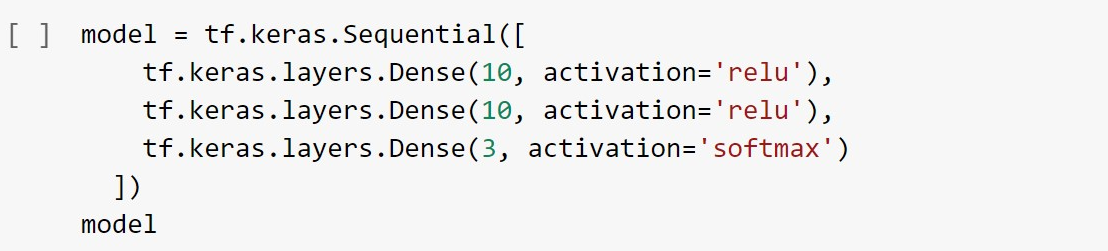

pytorch

texto en negrita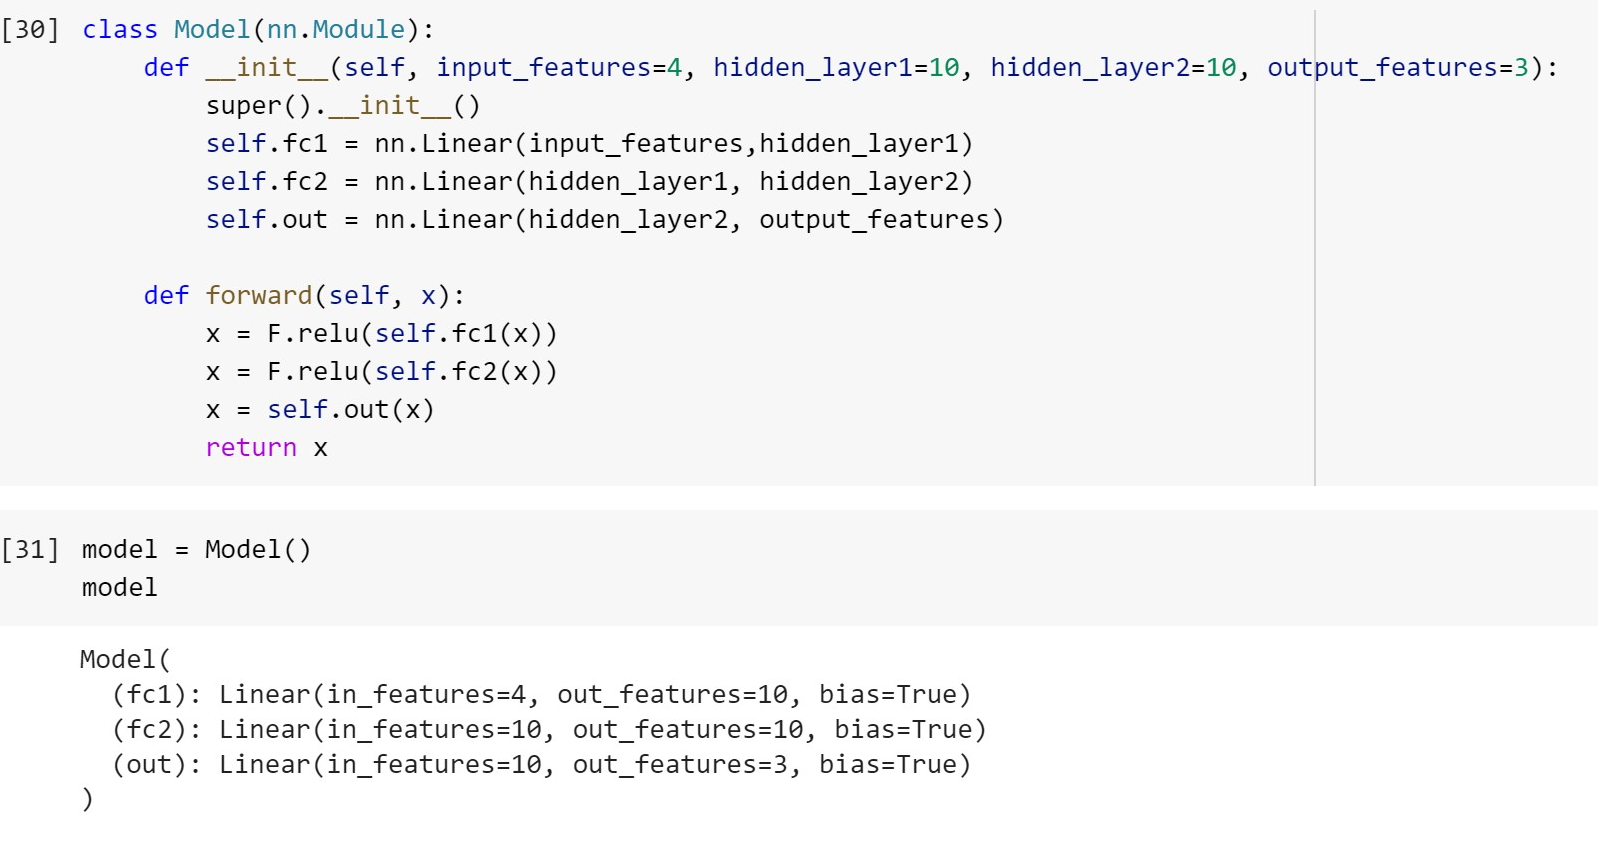

b) Entrenamiento

keras

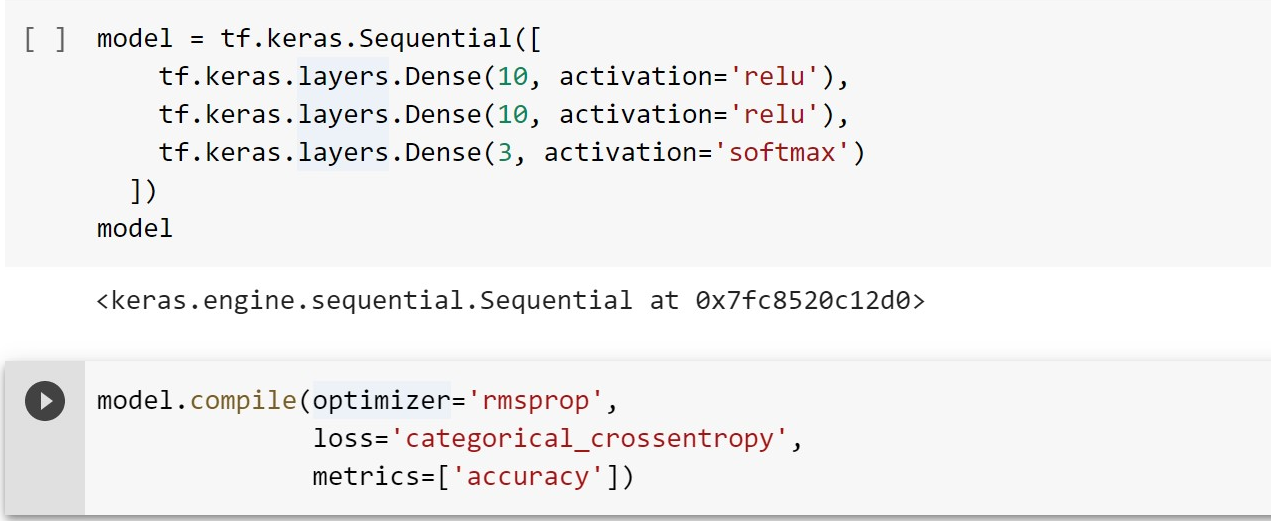

pytorch

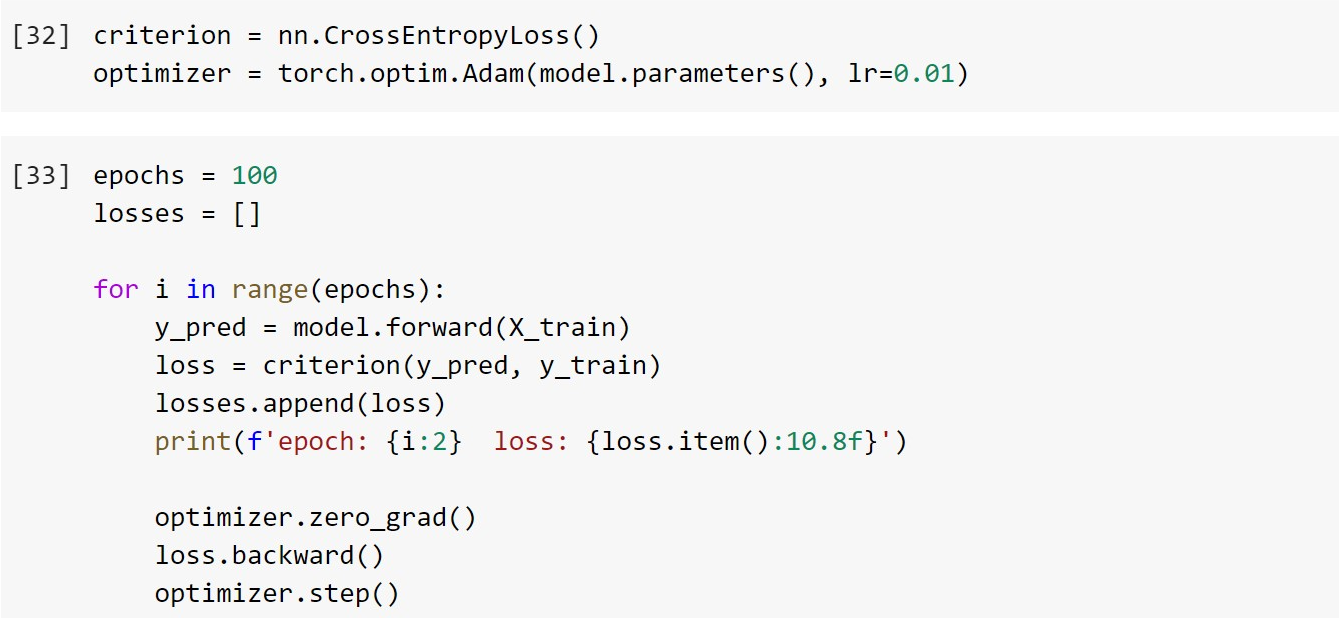

c) Prueba

Keras

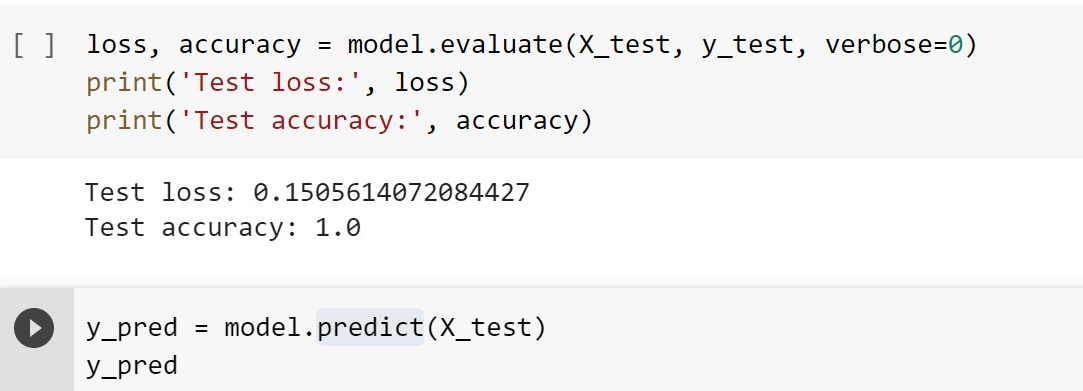

pytorch

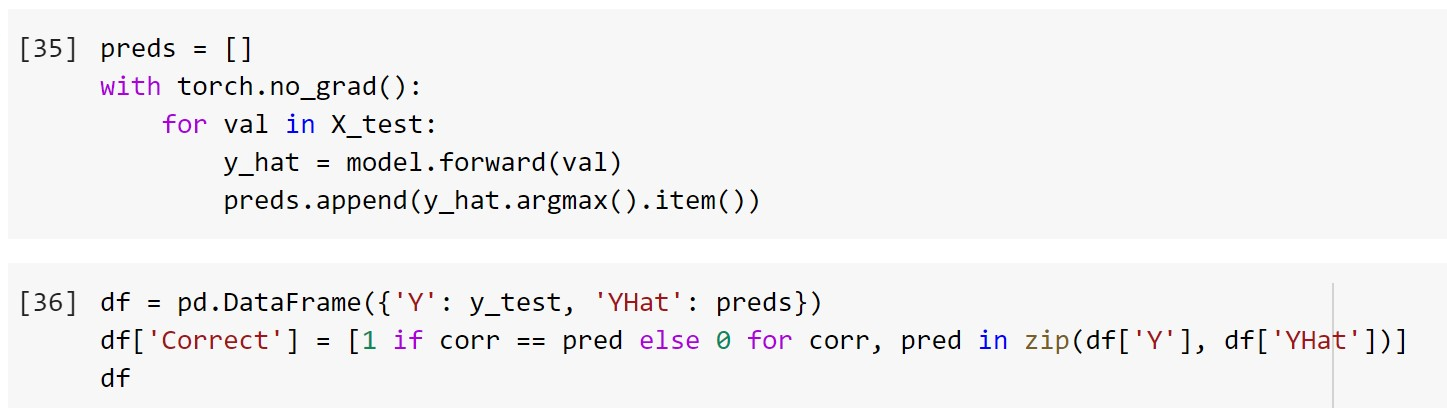

**Keras vs TensroFlow vs Pytorch**

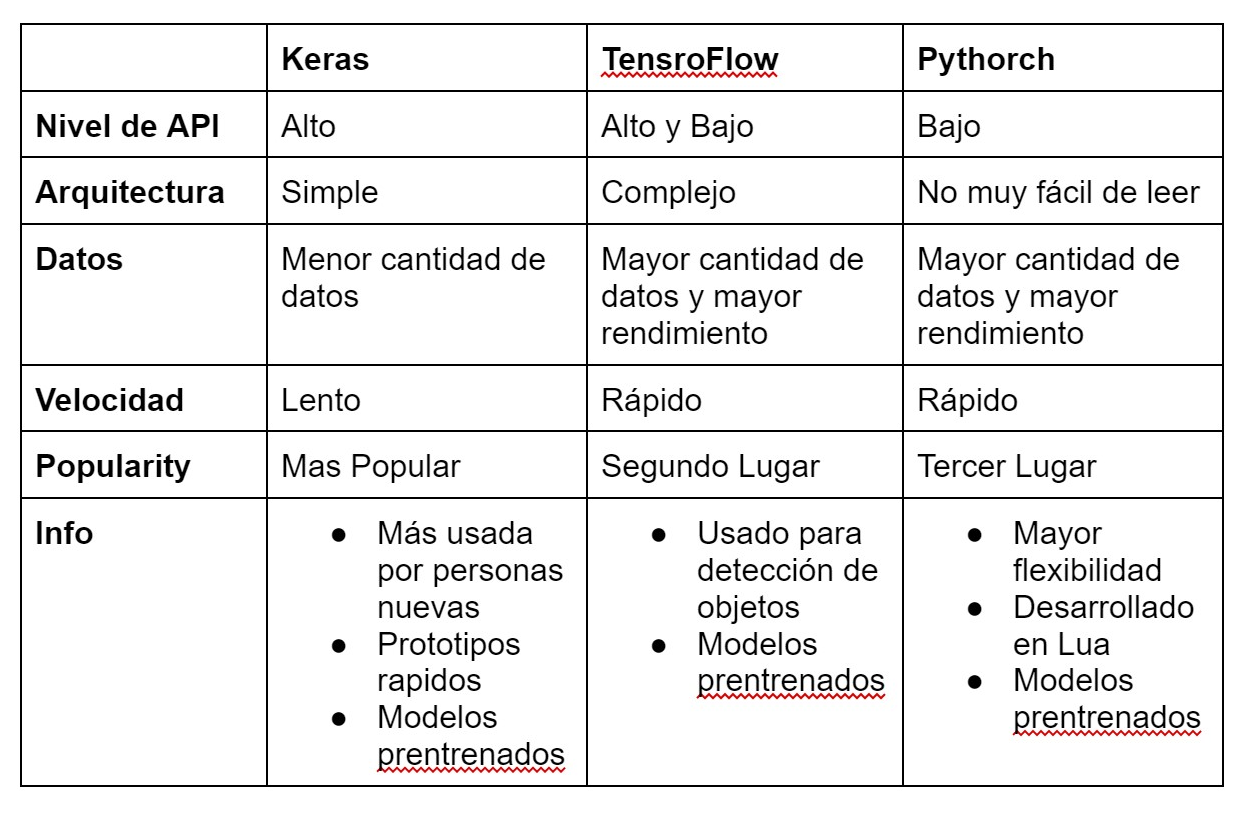